In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from google.colab import files 
import matplotlib.pyplot as plt
from keras.applications import VGG19
from keras.layers import Conv2D, MaxPooling2D,Dense,Activation,Dropout,Flatten,BatchNormalization
from keras.layers import Dense,Dropout,Input,MaxPooling2D,MaxPool2D,Conv2D,Flatten
from keras.models import Sequential
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam,SGD

In [ ]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"<username>","key":"<apikey>"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d moltean/fruits
!unzip 'fruits.zip' -d fruits

In [ ]:
IMAGE_SIZE = 224
BATCH_SIZE = 64

datagen = tf.keras.preprocessing.image.ImageDataGenerator()

# Train generator for train folder
train_generator = datagen.flow_from_directory(
    "/content/fruits/fruits-360_dataset/fruits-360/Training/",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    class_mode="categorical",
    color_mode="rgb",
    batch_size=BATCH_SIZE)

# Test generator for test folder
test_generator = datagen.flow_from_directory(
    "/content/fruits/fruits-360_dataset/fruits-360/Test/",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    class_mode="categorical",
    color_mode="rgb",
    batch_size=BATCH_SIZE)

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [ ]:
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import ReduceLROnPlateau


model = Sequential()
model.add(Conv2D(32,(3,3),input_shape =(IMAGE_SIZE,IMAGE_SIZE,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(131)) # output
model.add(Activation("softmax"))

model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 activation_5 (Activation)   (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 47, 47, 32)        9248      
                                                                 
 activation_6 (Activation)   (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                 

In [ ]:
epochs = 10

checkpoint = ModelCheckpoint('model.{epoch:02d}-{val_loss:.2f}.h5',
                             monitor='val_loss',
                             verbose=0,
                             save_best_only=True,
                             mode='auto')

history = model.fit(train_generator, 
                    steps_per_epoch=len(train_generator), 
                    epochs=epochs, 
                    validation_data=test_generator, 
                    validation_steps=len(test_generator),
                    callbacks=[checkpoint])

Epoch 1/10
1058/1058 [==============================] - 64s 60ms/step - loss: 1.5300 - accuracy: 0.7653 - val_loss: 0.8709 - val_accuracy: 0.8829
Epoch 2/10
1058/1058 [==============================] - 59s 56ms/step - loss: 0.2528 - accuracy: 0.9596 - val_loss: 1.2973 - val_accuracy: 0.8984
Epoch 3/10
1058/1058 [==============================] - 56s 53ms/step - loss: 0.2291 - accuracy: 0.9746 - val_loss: 2.0414 - val_accuracy: 0.8846
Epoch 4/10
1058/1058 [==============================] - 55s 52ms/step - loss: 0.2939 - accuracy: 0.9799 - val_loss: 1.5815 - val_accuracy: 0.9355
Epoch 5/10
1058/1058 [==============================] - 54s 51ms/step - loss: 0.3176 - accuracy: 0.9836 - val_loss: 2.8180 - val_accuracy: 0.9260
Epoch 6/10
1058/1058 [==============================] - 56s 53ms/step - loss: 0.3208 - accuracy: 0.9865 - val_loss: 2.3979 - val_accuracy: 0.9307
Epoch 7/10
1058/1058 [==============================] - 57s 54ms/step - loss: 0.4346 - accuracy: 0.9864 - val_loss: 3.1496 -

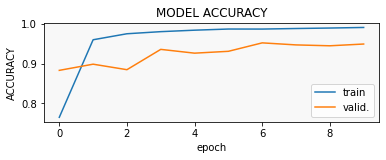

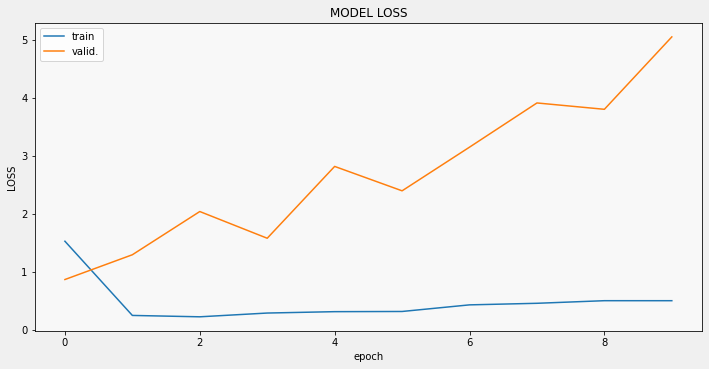

In [ ]:
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('MODEL '+ title)
    ax.set_ylabel(title)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

display_training_curves(
    history.history['accuracy'],
    history.history['val_accuracy'],
    'ACCURACY',
    212,
)
    

display_training_curves(
    history.history['loss'],
    history.history['val_loss'],
    'LOSS',
    211,
)  


In [ ]:
epochs = 3

checkpoint = ModelCheckpoint('model.{epoch:02d}-{val_loss:.2f}.h5',
                             monitor='val_loss',
                             verbose=0,
                             save_best_only=True,
                             mode='auto')

history = model.fit(test_generator, 
                    steps_per_epoch=len(test_generator), 
                    epochs=epochs, 
                    validation_data=train_generator, 
                    validation_steps=len(train_generator),
                    callbacks=[checkpoint])

Epoch 1/3
355/355 [==============================] - 53s 150ms/step - loss: 0.7019 - accuracy: 0.9831 - val_loss: 0.2363 - val_accuracy: 0.9937
Epoch 2/3
355/355 [==============================] - 57s 162ms/step - loss: 0.6055 - accuracy: 0.9873 - val_loss: 0.0752 - val_accuracy: 0.9968
Epoch 3/3
355/355 [==============================] - 53s 149ms/step - loss: 0.5390 - accuracy: 0.9885 - val_loss: 0.1711 - val_accuracy: 0.9955


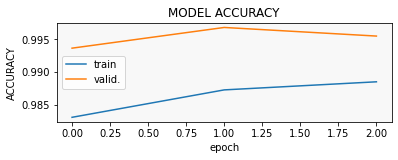

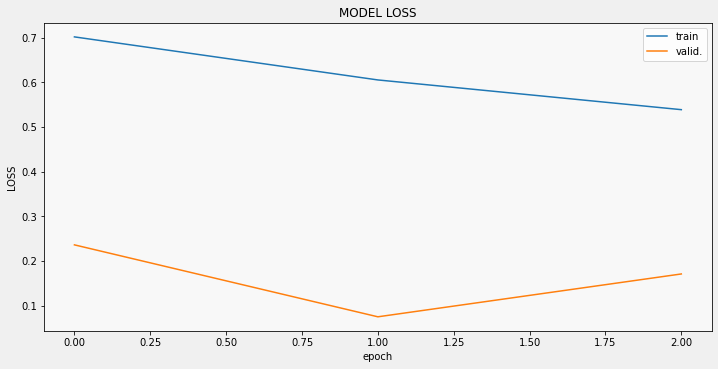

In [ ]:
display_training_curves(
    history.history['accuracy'],
    history.history['val_accuracy'],
    'ACCURACY',
    212,
)
    

display_training_curves(
    history.history['loss'],
    history.history['val_loss'],
    'LOSS',
    211,
)  

# **Test the Accuracy**

In [ ]:
score = model.evaluate(train_generator,batch_size=32)
print("Accuracy: {:.2f}%".format(score[1] * 100)) 
print("Loss: ",score[0])

1058/1058 [==============================] - 43s 41ms/step - loss: 0.1711 - accuracy: 0.9955
Accuracy: 99.55%
Loss:  0.17113788425922394


In [ ]:
score = model.evaluate(test_generator,batch_size=32)
print("Accuracy: {:.2f}%".format(score[1] * 100)) 
print("Loss: ",score[0])

355/355 [==============================] - 14s 40ms/step - loss: 0.0030 - accuracy: 0.9998
Accuracy: 99.98%
Loss:  0.003048603655770421


In [ ]:
class_names=train_generator.class_indices

labels={}
for key, value in class_names.items():
    labels[value]=key
labels

{0: 'Apple Braeburn',
 1: 'Apple Crimson Snow',
 2: 'Apple Golden 1',
 3: 'Apple Golden 2',
 4: 'Apple Golden 3',
 5: 'Apple Granny Smith',
 6: 'Apple Pink Lady',
 7: 'Apple Red 1',
 8: 'Apple Red 2',
 9: 'Apple Red 3',
 10: 'Apple Red Delicious',
 11: 'Apple Red Yellow 1',
 12: 'Apple Red Yellow 2',
 13: 'Apricot',
 14: 'Avocado',
 15: 'Avocado ripe',
 16: 'Banana',
 17: 'Banana Lady Finger',
 18: 'Banana Red',
 19: 'Beetroot',
 20: 'Blueberry',
 21: 'Cactus fruit',
 22: 'Cantaloupe 1',
 23: 'Cantaloupe 2',
 24: 'Carambula',
 25: 'Cauliflower',
 26: 'Cherry 1',
 27: 'Cherry 2',
 28: 'Cherry Rainier',
 29: 'Cherry Wax Black',
 30: 'Cherry Wax Red',
 31: 'Cherry Wax Yellow',
 32: 'Chestnut',
 33: 'Clementine',
 34: 'Cocos',
 35: 'Corn',
 36: 'Corn Husk',
 37: 'Cucumber Ripe',
 38: 'Cucumber Ripe 2',
 39: 'Dates',
 40: 'Eggplant',
 41: 'Fig',
 42: 'Ginger Root',
 43: 'Granadilla',
 44: 'Grape Blue',
 45: 'Grape Pink',
 46: 'Grape White',
 47: 'Grape White 2',
 48: 'Grape White 3',
 49: '

In [ ]:
!rm -R '/content/model'
!mkdir '/content/model'
model.save('/content/model')

!zip -r model.zip /content/model

rm: cannot remove '/content/model': No such file or directory


  adding: content/model/ (stored 0%)
  adding: content/model/saved_model.pb (deflated 90%)
  adding: content/model/variables/ (stored 0%)
  adding: content/model/variables/variables.data-00000-of-00001 (deflated 14%)
  adding: content/model/variables/variables.index (deflated 66%)
  adding: content/model/keras_metadata.pb (deflated 92%)
  adding: content/model/assets/ (stored 0%)


In [ ]:
!cp model.zip /content/drive/MyDrive/model/

# **Test Data**

2/2 [==============================] - 0s 20ms/step
104
104
Plum 3


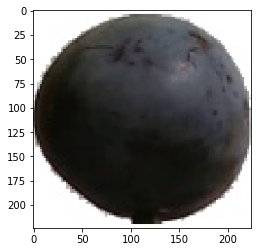

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
images, _ = next(train_generator)
model = tf.keras.models.load_model('/content/content/model/')
plt.imshow(images[0].astype('uint8'))
print(np.argmax(model.predict(images)))
print(np.argmax(_))
print(labels[np.argmax(_)])

2/2 [==============================] - 0s 20ms/step
64
64
Mango


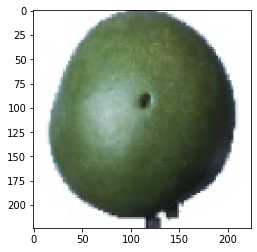

In [ ]:
images, _ = next(train_generator)
plt.imshow(images[0].astype('uint8'))
print(np.argmax(model.predict(images)))
print(np.argmax(_))
print(labels[np.argmax(_)])

2/2 [==============================] - 0s 17ms/step
6
6
Apple Pink Lady


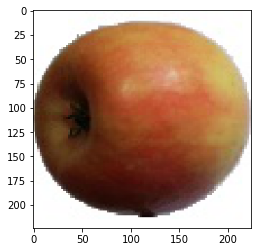

In [ ]:
images, _ = next(train_generator)
plt.imshow(images[0].astype('uint8'))
print(np.argmax(model.predict(images)))
print(np.argmax(_))
print(labels[np.argmax(_)])

2/2 [==============================] - 0s 20ms/step
65
65
Mango Red


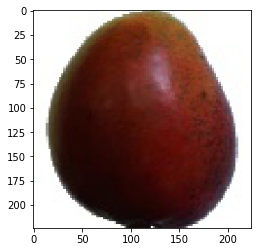

In [ ]:
images, _ = next(train_generator)
plt.imshow(images[0].astype('uint8'))
print(np.argmax(model.predict(images)))
print(np.argmax(_))
print(labels[np.argmax(_)])

# **Validation Data**

In [ ]:
val_generator = datagen.flow_from_directory(
    "/content/fruits/fruits-360-original-size/fruits-360-original-size/Validation/",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    class_mode="categorical",
    color_mode="rgb",
    batch_size=BATCH_SIZE)

Found 3114 images belonging to 24 classes.


2/2 [==============================] - 0s 21ms/step
Pepper Yellow
Apple Braeburn


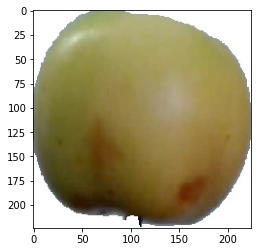

In [ ]:
images, _ = next(val_generator)
plt.imshow(images[0].astype('uint8'))
print(labels[np.argmax(model.predict(images))])
print(labels[np.argmax(_)])

2/2 [==============================] - 0s 20ms/step
Apple Red 3
Apple Red Delicious


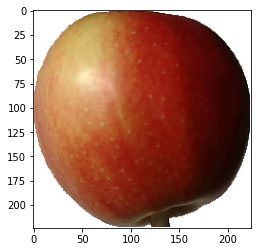

In [ ]:
images, _ = next(val_generator)
plt.imshow(images[0].astype('uint8'))
print(labels[np.argmax(model.predict(images))])
print(labels[np.argmax(_)])

2/2 [==============================] - 0s 20ms/step
Apple Crimson Snow
Apple Golden 1


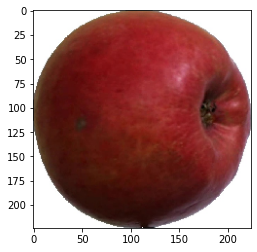

In [ ]:
images, _ = next(val_generator)
plt.imshow(images[0].astype('uint8'))
print(labels[np.argmax(model.predict(images))])
print(labels[np.argmax(_)])

2/2 [==============================] - 0s 20ms/step
Apple Crimson Snow
Apple Golden 1


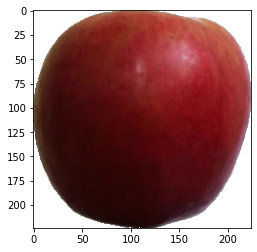

In [ ]:
images, _ = next(val_generator)
plt.imshow(images[0].astype('uint8'))
print(labels[np.argmax(model.predict(images))])
print(labels[np.argmax(_)])